# A library of mark scaling functions which preserve endpoints.

## The following scaling functions are available:

In [1]:
import lesterScaling
lesterScaling.scaling_functions

[<function lesterScaling.hyperbolic(x, p)>,
 <function lesterScaling.skewSymmetric(x, p)>,
 <function lesterScaling.skewTopHinged(x, p)>,
 <function lesterScaling.skewBottomHinged(x, p)>]

## A couple of toy usage examples:

In [2]:
import lesterScaling

raw_marks = [ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100 ]

max_mark = 100               # The maximum possible mark, not the largest mark obtained.

p_value = 0.05               # Parameter to choose how strong the mark scaling shouild be. 

# Scale the above raw marks and round to one decimal place using the "hyperbolic" scaling function:
scaled_marks_1 = [ round(lesterScaling.hyperbolic(raw_mark/max_mark, p_value)*max_mark, 1) \
                    for raw_mark in raw_marks ]

print("The hyperbolic scaling option with strength p="+str(p_value)+" scales these raw marks:\n")
print("     "+str(raw_marks))
print("")
print("to these scaled marks:\n")
print("     "+str(scaled_marks_1)+".")

# Scale the above raw marks and round to one decimal place using the "skewMean" scaling function:
scaled_marks_2 = [ round(lesterScaling.skewSymmetric(raw_mark/max_mark, p_value)*max_mark, 1) \
                    for raw_mark in raw_marks ]

print("")
print("Alternatively, for the same scaling strength the skewSymmetric scaling function would generate:\n")
print("     "+str(scaled_marks_2)+".")


The hyperbolic scaling option with strength p=0.05 scales these raw marks:

     [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

to these scaled marks:

     [0.0, 11.9, 23.4, 34.4, 44.9, 55.0, 64.7, 74.0, 83.0, 91.6, 100.0].

Alternatively, for the same scaling strength the skewSymmetric scaling function would generate:

     [0.0, 11.7, 22.6, 33.1, 43.4, 53.5, 63.3, 73.0, 82.4, 91.5, 100.0].


# Plot the scaling functions:

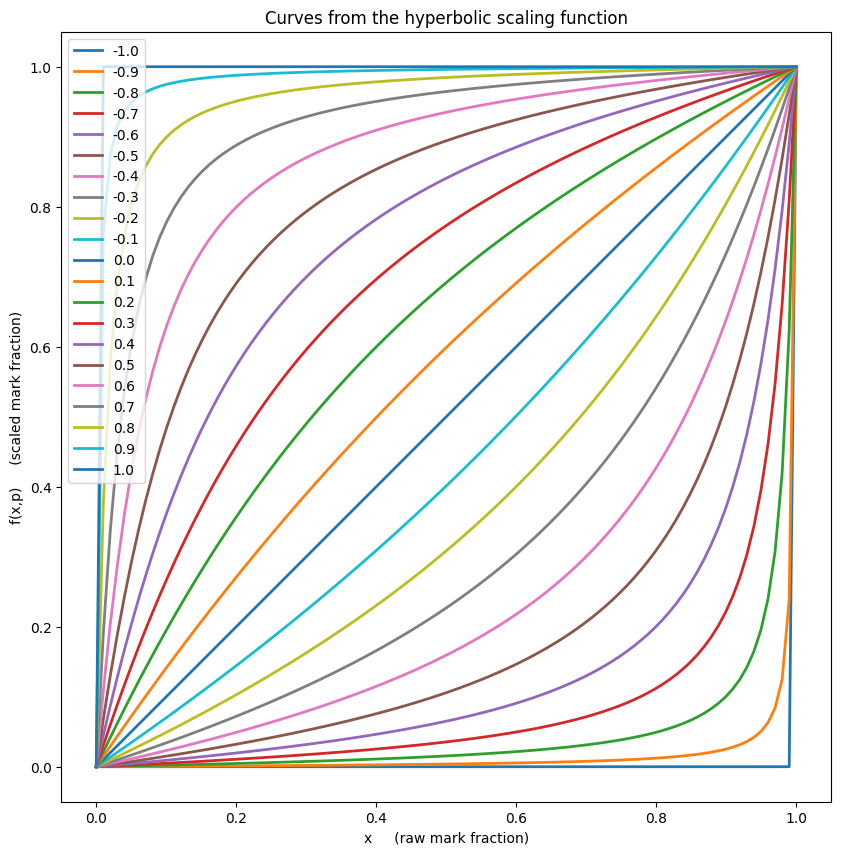

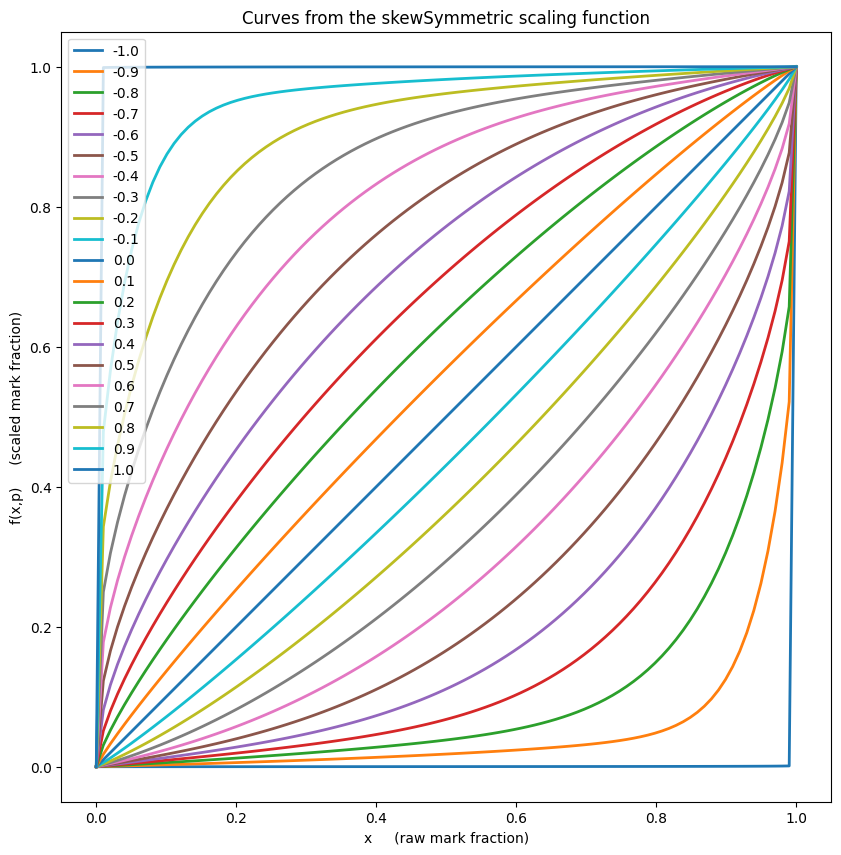

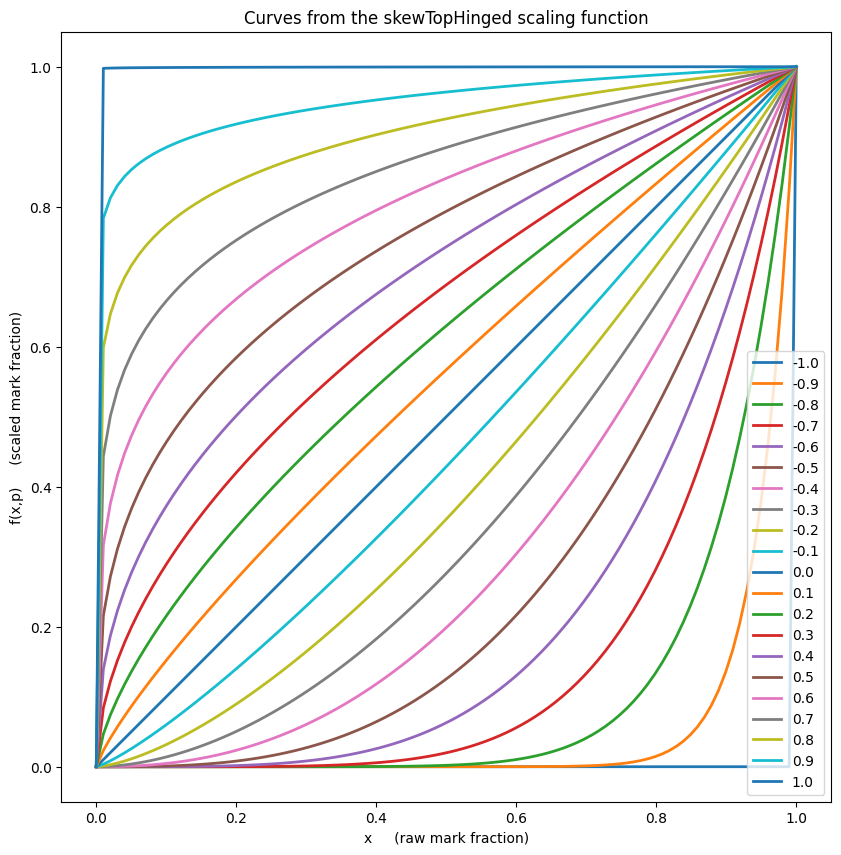

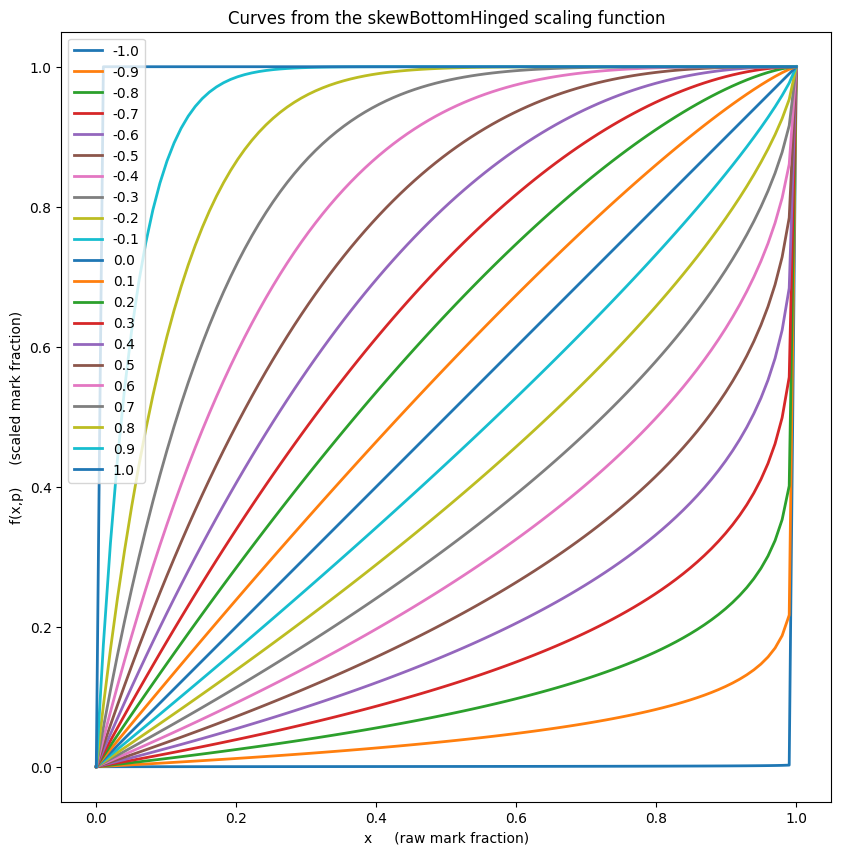

In [3]:
lesterScaling.plot_scaling_function_curves()